In [127]:
setwd('D:/Working/03.Korea/회귀분석/report/Chapter5/Chapter5')
p159_data <- read.table("P159.txt", header = TRUE)
str(p159_data)

'data.frame':	60 obs. of  4 variables:
 $ Age   : int  19 19 19 19 19 19 21 19 19 20 ...
 $ Height: int  61 70 70 71 64 64 69 67 62 66 ...
 $ Weight: int  180 160 135 195 130 120 135 125 120 145 ...
 $ Sex   : int  0 0 0 0 1 1 1 0 1 0 ...


In [128]:
# (a) 변수들의 역할에 동의하는가? 아니면 역할이 바뀌어야 하는가?
# 학생들의 키와 몸무게의 관계를 연구하고자 한다.
cat('[반응변수 Weight, 예측변수 Height]')
summary(reg1<-lm(Weight ~ Height,p159_data))
cat('[반응변수 Height, 예측변수 Weight]')
summary(reg2<-lm(Height ~ Weight,p159_data))

[반응변수 Weight, 예측변수 Height]


Call:
lm(formula = Weight ~ Height, data = p159_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.209 -15.436  -4.599   9.672  61.271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -85.4990    52.5563  -1.627    0.109    
Height        3.3480     0.7878   4.250 7.86e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.89 on 58 degrees of freedom
Multiple R-squared:  0.2375,	Adjusted R-squared:  0.2243 
F-statistic: 18.06 on 1 and 58 DF,  p-value: 7.861e-05


[반응변수 Height, 예측변수 Weight]


Call:
lm(formula = Height ~ Weight, data = p159_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8555  -1.7525   0.4033   2.1020   5.6269 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 56.86217    2.33183   24.39  < 2e-16 ***
Weight       0.07092    0.01669    4.25 7.86e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.186 on 58 degrees of freedom
Multiple R-squared:  0.2375,	Adjusted R-squared:  0.2243 
F-statistic: 18.06 on 1 and 58 DF,  p-value: 7.861e-05


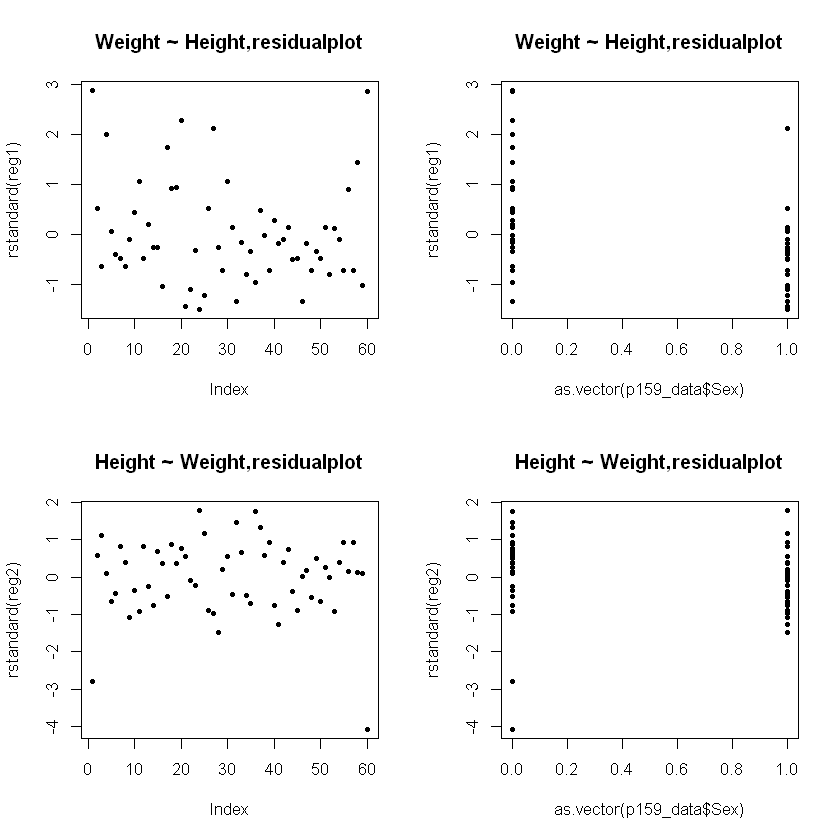

In [143]:
# (b) 두 집단의 학생들에 대한 키와 몸무게의 관계를 하나의 방정식으로 묘사할 수 있는가?
# 통합 데이터에 그 모형을 적합하고 표준화 잔차를 검사하여라

par(mfrow=c(2,2))
plot(rstandard(reg1),main="Weight ~ Height,residualplot",pch=20)
plot(as.vector(p159_data$Sex),rstandard(reg1),main="Weight ~ Height,residualplot",pch=20)
plot(rstandard(reg2),main="Height ~ Weight,residualplot",pch=20)
plot(as.vector(p159_data$Sex),rstandard(reg2),main="Height ~ Weight,residualplot",pch=20)

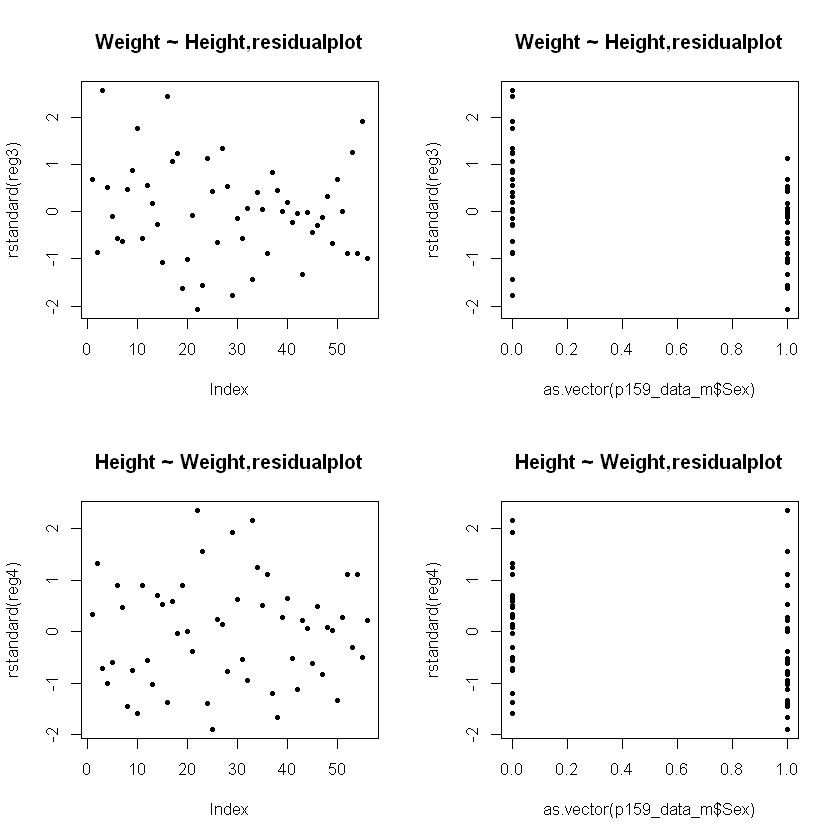

In [184]:
par(mfrow=c(2,2))
p159_data_m <- p159_data[-c(1,20,27,60),]
reg3<-lm(Weight ~ Height,p159_data_m)
reg4<-lm(Height ~ Weight,p159_data_m)

plot(rstandard(reg3),main="Weight ~ Height,residualplot",pch=20)
plot(as.vector(p159_data_m$Sex),rstandard(reg3),main="Weight ~ Height,residualplot",pch=20)
plot(rstandard(reg4),main="Height ~ Weight,residualplot",pch=20)
plot(as.vector(p159_data_m$Sex),rstandard(reg4),main="Height ~ Weight,residualplot",pch=20)

In [131]:
cat('[반응변수 Weight, 예측변수 Height]')
summary(reg5<-lm(Weight ~ (Age + Height) * Sex,p159_data_m))
cat('[반응변수 Height, 예측변수 Weight]')
summary(reg6<-lm(Height ~ (Age + Weight) * Sex,p159_data_m))

[반응변수 Weight, 예측변수 Height]


Call:
lm(formula = Weight ~ (Age + Height) * Sex, data = p159_data_m)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.042  -8.200   0.349  10.462  34.978 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -19.073    112.291  -0.170   0.8658   
Age           -5.444      4.237  -1.285   0.2048   
Height         3.979      1.404   2.835   0.0066 **
Sex           25.258    130.783   0.193   0.8476   
Age:Sex        5.009      4.436   1.129   0.2643   
Height:Sex    -2.089      1.765  -1.184   0.2421   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.69 on 50 degrees of freedom
Multiple R-squared:  0.5889,	Adjusted R-squared:  0.5477 
F-statistic: 14.32 on 5 and 50 DF,  p-value: 1.064e-08


[반응변수 Height, 예측변수 Weight]


Call:
lm(formula = Height ~ (Age + Weight) * Sex, data = p159_data_m)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9768 -1.3347 -0.3907  1.1299  6.0955 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 47.18114   12.78030   3.692 0.000551 ***
Age          0.78044    0.62307   1.253 0.216187    
Weight       0.04495    0.02235   2.011 0.049714 *  
Sex         -0.93242   14.00852  -0.067 0.947197    
Age:Sex     -0.45794    0.65111  -0.703 0.485115    
Weight:Sex   0.05677    0.04339   1.308 0.196767    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.201 on 50 degrees of freedom
Multiple R-squared:  0.559,	Adjusted R-squared:  0.5149 
F-statistic: 12.67 on 5 and 50 DF,  p-value: 5.722e-08


In [201]:
#(c) 학생들의 키와 몸무게의 관계를 묘사하는 최적의 모형을 찾아라.

# M1 : Weight ~ Height
sum3<-summary(reg3)
M1 <- c(sum3$r.squared, sum3$adj.r.squared, sum3$coefficients['Height','Pr(>|t|)'])

# M2 : Height ~ Weight
sum4<-summary(reg4)
M2 <- c(sum4$r.squared, sum4$adj.r.squared, sum4$coefficients['Weight','Pr(>|t|)'])

# M3 : Weight ~ (Age + Height) * Sex
sum5<-summary(reg5)
r3 <- c(sum5$r.squared, sum5$adj.r.squared, sum5$coefficients['Height','Pr(>|t|)'])

# M4 : Height ~ (Age + Weight) * Sex
sum6<-summary(reg6)
r4 <- c(sum6$r.squared, sum6$adj.r.squared, sum6$coefficients['Weight','Pr(>|t|)'])

# M5 : Weight ~ Age + Height + Sex
reg7<-lm(Weight ~ Age + Height + Sex,p159_data_m)
sum7<-summary(reg7)
r5 <- c(sum7$r.squared, sum7$adj.r.squared, sum7$coefficients['Height','Pr(>|t|)'])

# M6 : Height ~ Age + Weight + Sex
reg8<-lm(Height ~ Age + Weight + Sex,p159_data_m)
sum8<-summary(reg8)
r6 <- c(sum8$r.squared, sum8$adj.r.squared, sum8$coefficients['Weight','Pr(>|t|)'])

result <- t(data.frame(r1, r2, r3, r4, r5, r6))
colnames(result) <- header <- c('r^2', 'adj r^2', 'p-value')

result

#(d) 몸무게를 예측 하기 위한 변수로서 나이를 포함 시켜야 한다고 생각하는가? 대답에 대한 직과적 견해를 제시.

anova(reg3, reg5, reg7)

anova(reg4, reg6, reg8)

,r^2,adj r^2,p-value
r1,0.4345198,0.4240480,3.314475e-08
r2,0.4345198,0.4240480,3.314475e-08
r3,0.5888625,0.5477488,6.598352e-03
r4,0.5589650,0.5148615,4.971407e-02
r5,0.5707402,0.5459752,3.411840e-03
r6,0.5388270,0.5122209,3.411840e-03


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
54,14849.63,NA,NA,NA,NA
50,10796.56,4,4053.0732,4.692553,0.00270797
52,11272.46,-2,-475.8977,1.101966,0.34014934


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
54,310.6910,NA,NA,NA,NA
50,242.3172,4,68.37373,3.527077,0.01301435
52,253.3816,-2,-11.06436,1.141516,0.32751493
